In [308]:
import numpy as np
import pandas as pd
import re

In [28]:
df = pd.read_csv('/home/mr1142/Documents/Data/segmentation/splited/validation/validation_data.csv')
labels = [re.split('[|]', df['Finding Labels'][i]) for i in df.index]
labels = [x for xs in labels for x in xs]
labels = list(np.unique(labels))
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [356]:
path = '/home/mr1142/Documents/Data/models/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [357]:
df.sort_values('dice_coef_loss')

,type,name,loss,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
17,uloss,renacimiento_validation_4,0.119882,0.030873,0.088655,0.975076,0.976777,80748.0,80958.0
15,uloss,renacimiento_validation_3,0.119526,0.030919,0.088200,0.975120,0.976994,80190.0,81231.0
12,unet,renacimiento_validation_2,0.032413,0.031955,0.089793,0.974418,0.973736,70983.0,94992.0
10,unet,renacimiento_validation_1,0.032621,0.032179,0.092485,0.973949,0.974434,88665.0,80353.0
14,unet,renacimiento_validation_3,0.033088,0.032720,0.098321,0.973591,0.974356,92355.0,78991.0
16,unet,renacimiento_validation_4,0.034823,0.034295,0.098386,0.972277,0.971930,88000.0,91869.0
2,unet,_albumentation_validation_2.h5,0.034487,0.034487,0.095812,0.973940,0.974166,7962.0,5701.0
7,uloss,albumentation_rotate_3_validation_2,0.129951,0.034909,0.094568,0.971946,0.973499,87304.0,94711.0
13,uloss,renacimiento_validation_2,0.131064,0.034971,0.095523,0.971893,0.973108,74191.0,108172.0
6,uloss,albumentation_rotate_3_validation_1,0.128454,0.035279,0.092766,0.971818,0.972174,78499.0,104346.0


In [329]:
len(df[df.type == 'uloss'])

8

In [330]:
len(df[df.type == 'uloss']) == len(df[df.type == 'unet'])

False

In [331]:
evaluations = list(df.columns[3:9])

for ev in evaluations:
    print(ev)
    print('unet: {}'.format(np.mean(df[ev][df.type == 'unet'])))
    print('uloss: {}'.format(np.mean(df[ev][df.type == 'uloss'])))
    print('-----')

dice_coef_loss
unet: 0.035244598612189294
uloss: 0.03494367375969887
-----
loss_mask
unet: 0.10043289512395859
uloss: 0.09659249801188707
-----
accuracy
unet: 0.9718972682952881
uloss: 0.9724575281143188
-----
AUC
unet: 0.9717268228530884
uloss: 0.9734307527542114
-----
false_positives
unet: 72604.2
uloss: 63398.5
-----
false_negatives
unet: 77451.5
uloss: 73117.5
-----


In [332]:
names = ['_albumentation', 'rotate', 'renacimiento']

In [333]:
tipos = {}
tipos['unet'] = {}
tipos['uloss'] = {}
for ev in evaluations:
    tipos['unet'][ev] = np.mean(df[ev][df.type == 'unet'])
    tipos['uloss'][ev] = np.mean(df[ev][df.type == 'uloss'])
    for name in names:
        index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
        try:
            tipos[name][ev] = np.mean(df[ev].iloc[index])
        except:
            tipos[name] = {}
            tipos[name][ev] = np.mean(df[ev].iloc[index])

In [334]:
tipos

{'unet': {'dice_coef_loss': 0.035244598612189294,
  'loss_mask': 0.10043289512395859,
  'accuracy': 0.9718972682952881,
  'AUC': 0.9717268228530884,
  'false_positives': 72604.2,
  'false_negatives': 77451.5},
 'uloss': {'dice_coef_loss': 0.03494367375969887,
  'loss_mask': 0.09659249801188707,
  'accuracy': 0.9724575281143188,
  'AUC': 0.9734307527542114,
  'false_positives': 63398.5,
  'false_negatives': 73117.5},
 '_albumentation': {'dice_coef_loss': 0.03676915168762207,
  'loss_mask': 0.10717159509658813,
  'accuracy': 0.9723238945007324,
  'AUC': 0.9721685945987701,
  'false_positives': 7447.25,
  'false_negatives': 7063.0},
 'rotate': {'dice_coef_loss': 0.03624377027153969,
  'loss_mask': 0.09839637825886409,
  'accuracy': 0.9708767533302307,
  'AUC': 0.9710817734400431,
  'false_positives': 86202.83333333333,
  'false_negatives': 102750.66666666667},
 'renacimiento': {'dice_coef_loss': 0.03255881528769221,
  'loss_mask': 0.09305190401417869,
  'accuracy': 0.9737606389181954,
  '

In [335]:
comparation = {}
for k in tipos['unet'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [336]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
renacimiento,0.032559,0.093052,0.973761,0.974477,82161.714286,88080.857143
uloss,0.034944,0.096592,0.972458,0.973431,63398.500000,73117.500000
unet,0.035245,0.100433,0.971897,0.971727,72604.200000,77451.500000
rotate,0.036244,0.098396,0.970877,0.971082,86202.833333,102750.666667
_albumentation,0.036769,0.107172,0.972324,0.972169,7447.250000,7063.000000


In [337]:
index = [i for i in df.index if any([bool(re.search(name, df['name'][i])) for name in ['old', 'clahe', 'gamma']])]

In [338]:
df = df.drop(index).reset_index()

In [339]:
tipos = {}
for tipo in ['unet', 'uloss']:
    for ev in evaluations:
        for name in names:
            index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
            try:
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])
            except:
                tipos[tipo + '_' + name] = {}
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])

In [340]:
tipos

{'unet__albumentation': {'dice_coef_loss': 0.03589135408401489,
  'loss_mask': 0.10652638971805573,
  'accuracy': 0.9729394912719727,
  'AUC': 0.972397118806839,
  'false_positives': 7674.0,
  'false_negatives': 6513.5},
 'unet_rotate': {'dice_coef_loss': 0.03665660570065181,
  'loss_mask': 0.10188330709934235,
  'accuracy': 0.9703687032063802,
  'AUC': 0.969934900601705,
  'false_positives': 86533.0,
  'false_negatives': 105716.66666666667},
 'unet_renacimiento': {'dice_coef_loss': 0.03278725501149893,
  'loss_mask': 0.09474632330238819,
  'accuracy': 0.9735588133335114,
  'AUC': 0.9736141264438629,
  'false_positives': 85000.75,
  'false_negatives': 86551.25},
 'uloss__albumentation': {'dice_coef_loss': 0.03764694929122925,
  'loss_mask': 0.10781680047512054,
  'accuracy': 0.9717082977294922,
  'AUC': 0.9719400703907014,
  'false_positives': 7220.5,
  'false_negatives': 7612.5},
 'uloss_rotate': {'dice_coef_loss': 0.035830934842427574,
  'loss_mask': 0.09490944941838582,
  'accuracy'

In [341]:
comparation = {}
for k in tipos['uloss_renacimiento'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [342]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
uloss_renacimiento,0.032254,0.090793,0.974030,0.975627,78376.333333,90120.333333
unet_renacimiento,0.032787,0.094746,0.973559,0.973614,85000.750000,86551.250000
uloss_rotate,0.035831,0.094909,0.971385,0.972229,85872.666667,99784.666667
unet__albumentation,0.035891,0.106526,0.972939,0.972397,7674.000000,6513.500000
unet_rotate,0.036657,0.101883,0.970369,0.969935,86533.000000,105716.666667
uloss__albumentation,0.037647,0.107817,0.971708,0.971940,7220.500000,7612.500000


In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

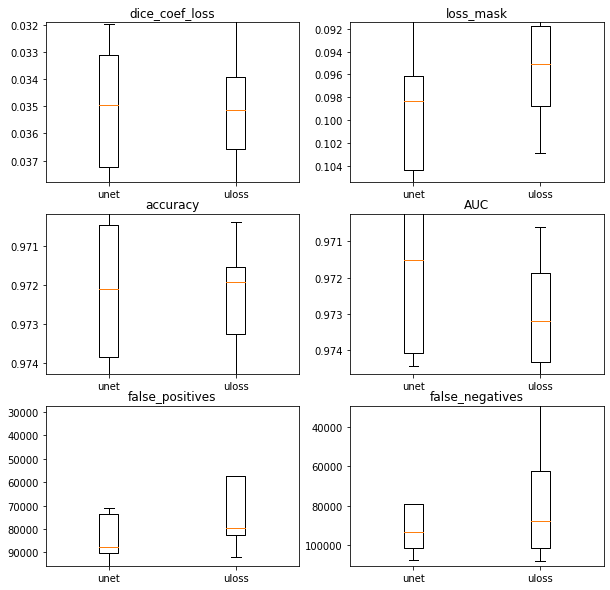

In [344]:
unet = df[['name'] + evaluations][df.type == 'unet'].reset_index()
uloss = df[['name'] + evaluations][df.type == 'uloss'].reset_index()

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10,10)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([unet[ev], uloss[ev]], labels = ['unet', 'uloss'])
    q1, q3 = np.percentile(df[ev], [20, 80])
    r = q1-q3
    ax[x,y].set_ylim(q1-1.1*r, q3+1.1*r)
    ax[x,y].set_title(ev)

In [345]:
# data = {}
# for tipo in ['unet', 'uloss']:
#     data[tipo] = {}
#     for name in names:
#         d = df[df.type == 'unet'].reset_index()
#         index = [i for i in d.index if bool(re.search(name, d['name'][i]))]
#         data[tipo][name] = d.iloc[index]

In [346]:
data = {}
for name in names:
    index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
    data[name] = df.iloc[index]

In [347]:
data

{'_albumentation':    index   type                            name      loss  dice_coef_loss  \
 0      0   unet  _albumentation_validation_1.h5  0.037296        0.037296   
 1      1  uloss  _albumentation_validation_1.h5  0.141863        0.038948   
 2      2   unet  _albumentation_validation_2.h5  0.034487        0.034487   
 3      3  uloss  _albumentation_validation_2.h5  0.149065        0.036346   
 
    loss_mask  accuracy       AUC  false_positives  false_negatives  
 0   0.117240  0.971939  0.970628           7386.0           7326.0  
 1   0.102915  0.970747  0.970617           7504.0           7833.0  
 2   0.095812  0.973940  0.974166           7962.0           5701.0  
 3   0.112719  0.972670  0.973263           6937.0           7392.0  ,
 'rotate':    index   type                                 name      loss  \
 4      4   unet  albumentation_rotate_3_validation_1  0.037508   
 5      5   unet  albumentation_rotate_3_validation_2  0.035893   
 6      6  uloss  albumentat

In [348]:
len(datos_unet)

3

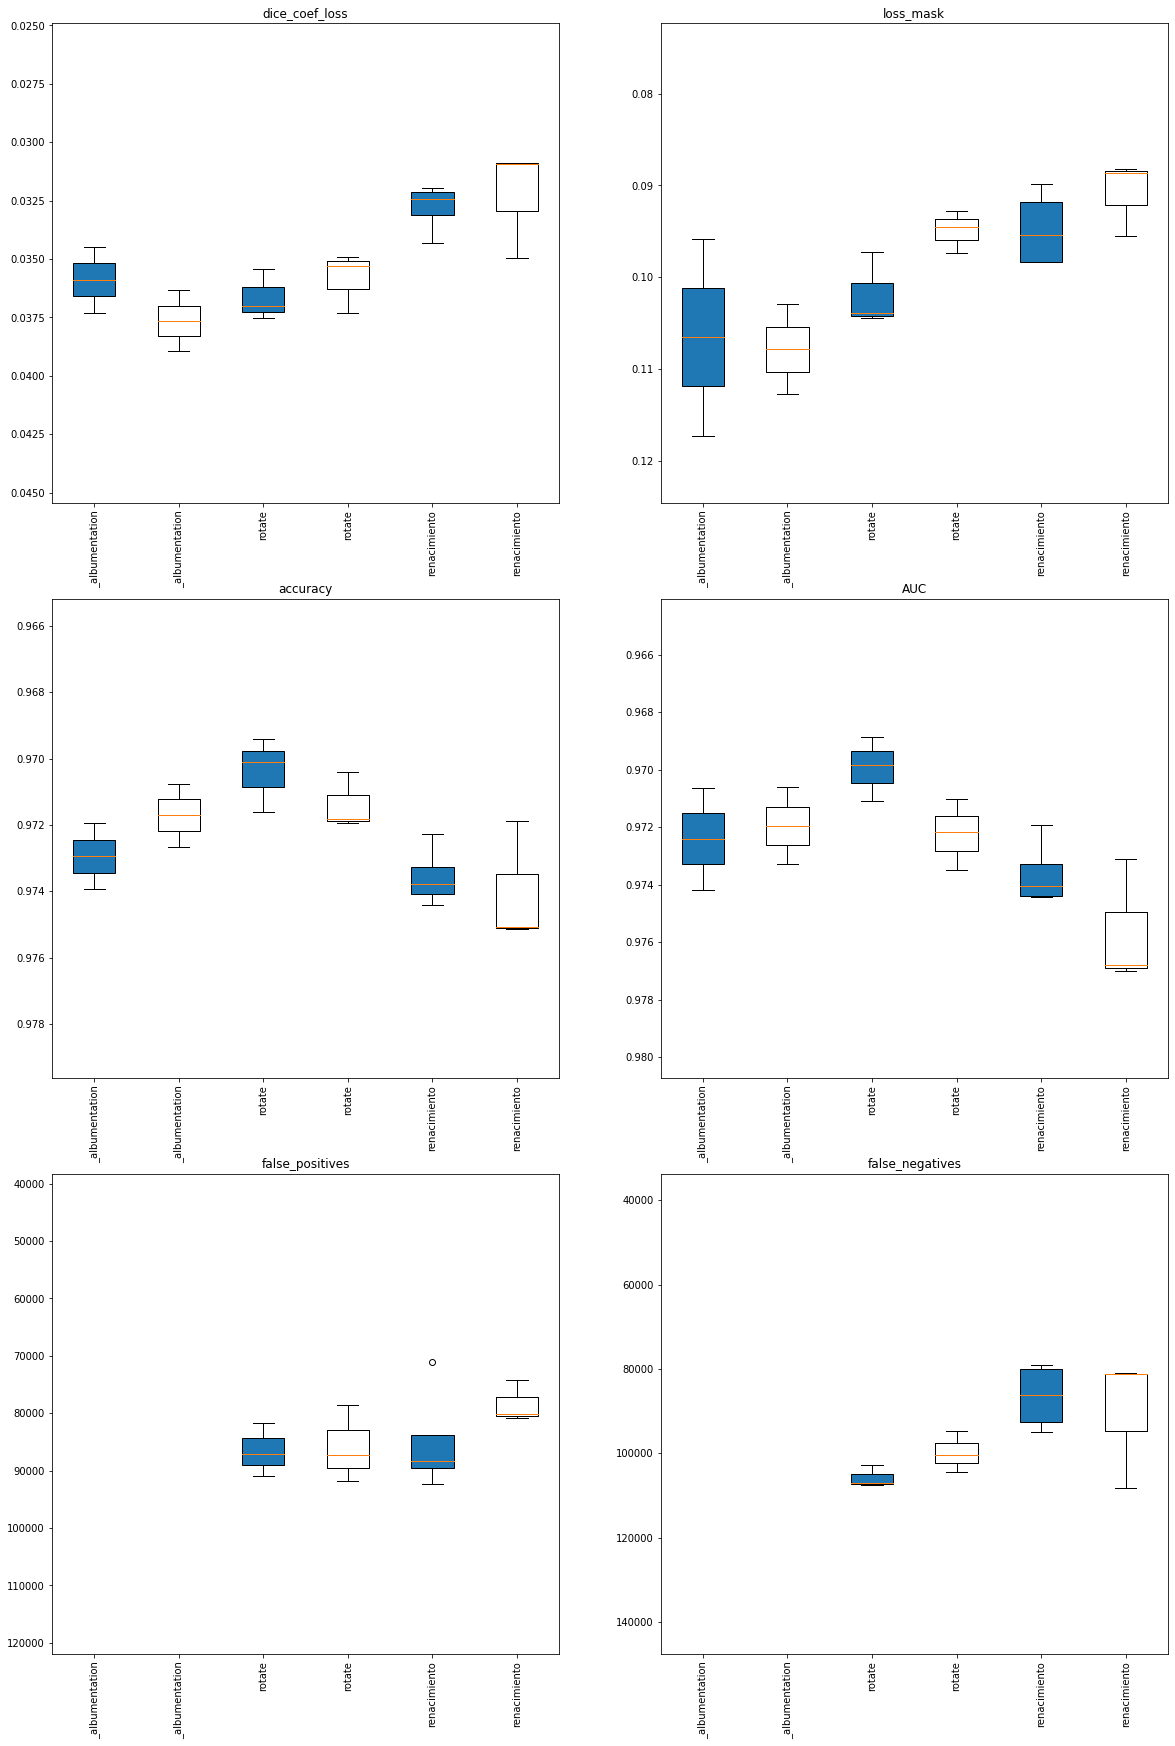

In [349]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20,30)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    datos_unet = [data[name][ev][data[name].type == 'unet'] for name in names]
    datos_uloss = [data[name][ev][data[name].type == 'uloss'] for name in names]
    labels = [name + '_unet' for name in names]
    ax[x,y].boxplot(datos_unet, positions = [1,3,5], patch_artist=True)
    labels = [name + '_uloss' for name in names]
    ax[x,y].boxplot(datos_uloss, positions = [2,4,6])
    q1, q3 = np.percentile(df[ev], [25, 75])
    r = q1-q3
    ax[x,y].set_xticklabels(names*2, rotation=90)
    ax[x,y].set_ylim(q1-3*r, q3+3*r)
    ax[x,y].set_title(ev)